<a href="https://colab.research.google.com/github/failure64/ads-optimization/blob/main/Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preprocessing

### Importing dataset and libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data_set=pd.read_csv('final dataset.csv')
X = data_set.iloc[:, :-1].values
y = data_set.iloc[:, -1].values

In [ ]:
print(data_set)

       Advertisement 1  Advertisement 2  Advertisement 3  Advertisement 4  \
0                    0                0                0                1   
1                    0                1                0                1   
2                    0                0                0                1   
3                    1                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
14995                1                1                0                0   
14996                0                1                0                1   
14997                0                0                0                0   
14998                0                0                0                0   
14999                0                0                0                0   

       Advertisement 5  Advertisement 6  Advertisement 7  Advertisement 8  

### Handling Missing Data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ="constant", fill_value=20)

imputer.fit(X[:, 0:1])
X[: , 0:1] = imputer.transform(X[:, 0:1])
print(X)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


### Encoding Categorical Data & Feature Scaling & Splitting

not possible in our case as we dont want to predict but we want to classify

# Upper Confidence Bound

### A/b Testing vs Multi Armed Bandit Problem

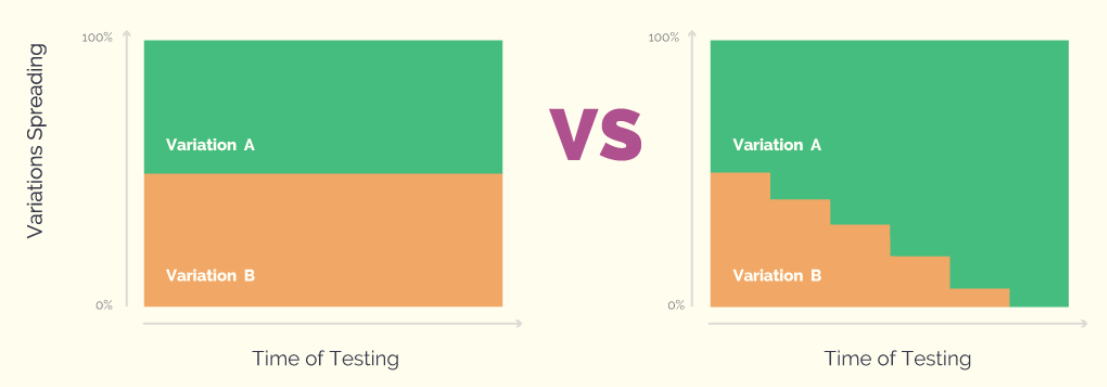

In [ ]:
import math as m
T= data_set.shape[0]
num_ads = data_set.shape[1]
ads_selected=[]

number_of_selections = [0] * num_ads
sum_of_rewards = [0] * num_ads
total_rewards = 0


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


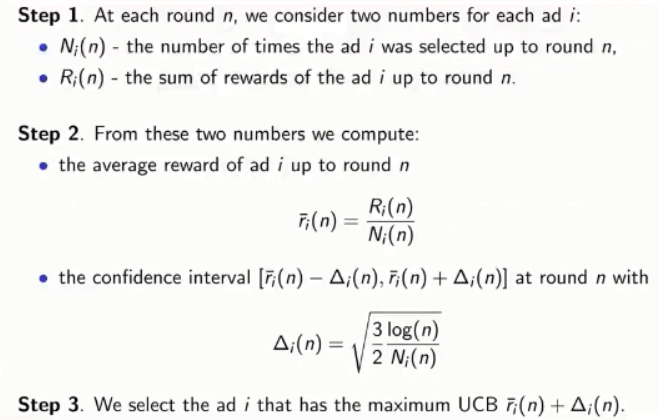

In [ ]:
for n in range(0,T): #over rows
  ad=0
  max_upper_confidence_bound =0
  for i in range(0,num_ads):
    if (number_of_selections[i] > 0):
      average_reward = sum_of_rewards[i] / number_of_selections[i]
      delta_i = m.sqrt(3/2 * m.log(n+1) / number_of_selections[i])
      upper_confidence_bound = average_reward + delta_i
    else:
      upper_confidence_bound = 1e400
    if(upper_confidence_bound > max_upper_confidence_bound):
      max_upper_confidence_bound = upper_confidence_bound
      ad=i
  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad] +1
  temp_reward = data_set.values[n,ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + temp_reward
  total_rewards = total_rewards+temp_reward

Visulization

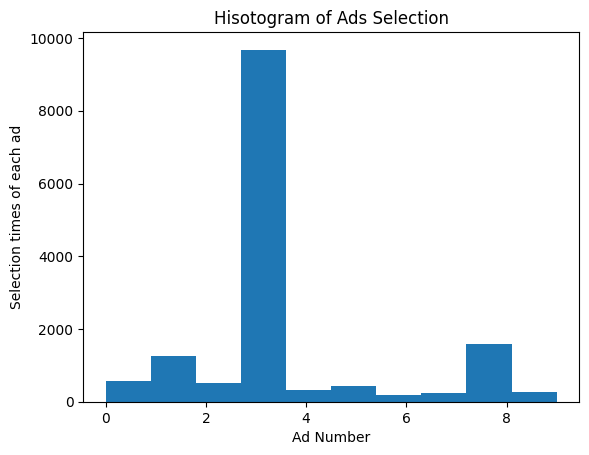

In [ ]:
plt.hist(ads_selected)
plt.title('Hisotogram of Ads Selection')
plt.xlabel("Ad Number")
plt.ylabel('Selection times of each ad')
plt.show()

## Thomas Sampling Algorithm

In [ ]:
import random
T= data_set.shape[0]
num_ads =data_set.shape[1]
ads_selected=[]

num_of_rewards_1 =[0] * num_ads
num_of_rewards_0 =[0] * num_ads

total_rewards=0

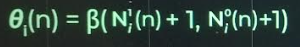

In [ ]:
for n in range(0,T):
  ad = 0
  max_random = 0
  for i in range(0,num_ads):
    random_beta = random.betavariate(num_of_rewards_1[i] +1, num_of_rewards_0[i]  + 1)
    if(random_beta > max_random):
      max_random = random_beta
      ad = i
    ads_selected.append(ad)
    reward = data_set.values[n,ad]

    if reward ==1:
      num_of_rewards_1[ad] = num_of_rewards_1[ad] + 1
    else:
      num_of_rewards_0[ad] = num_of_rewards_0[ad] + 1

    total_rewards = total_rewards + reward


Visulisation

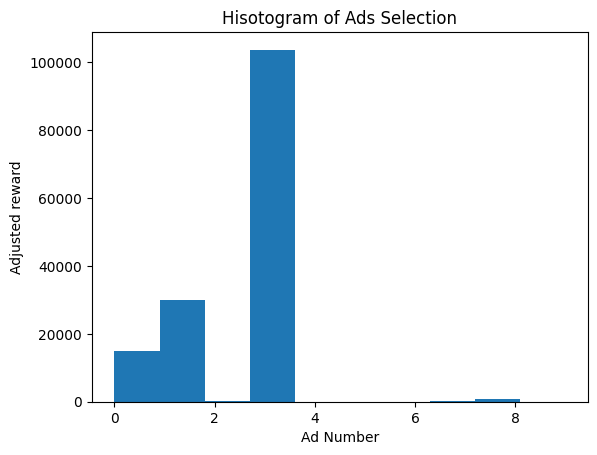

In [ ]:
plt.hist(ads_selected)
plt.title('Hisotogram of Ads Selection')
plt.xlabel("Ad Number")
plt.ylabel('Adjusted reward')
plt.show()